In [114]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn as skl
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 20)

In [115]:
data=pd.read_excel("./Data/Data DS Cotton Plus.xlsx", sheet_name="BD")
data.shape

(9976, 40)

In [116]:
Monto20= data["Monto Comprado 2020"].copy()
Segmento=data.loc[:,["Segmento"]].values
Recencia=data["Recencia (Tiempo transcurrido en semanas desde su ultima compra)"].copy()
Id=data["Cedula"].copy()
datos=data.loc[:,["Monto Comprado 2019?","Monto Comprado 2020","Edad","Recencia (Tiempo transcurrido en semanas desde su ultima compra)","Frecuencia (Cantidad items comprados)"]].values
#datos=data.loc[:,["Monto Comprado 2020","Recencia (Tiempo transcurrido en semanas desde su ultima compra)"]].values
Segmento
""" seg2=Segmento.copy()
s=-1
for i in Segmento:
    s=s+1
    if i == "Adictos":
        seg2[s]=1
    elif i == "Aficionados":
        seg2[s]=2
    elif i == "Esporádicos":
        seg2[s]=3
    elif i == "Curiosos":
        seg2[s]=4
    elif i == "Inactivo":
        seg2[s]=5
seg2 """


' seg2=Segmento.copy()\ns=-1\nfor i in Segmento:\n    s=s+1\n    if i == "Adictos":\n        seg2[s]=1\n    elif i == "Aficionados":\n        seg2[s]=2\n    elif i == "Esporádicos":\n        seg2[s]=3\n    elif i == "Curiosos":\n        seg2[s]=4\n    elif i == "Inactivo":\n        seg2[s]=5\nseg2 '

In [117]:
x=datos
y=Segmento

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.10,random_state=0)



In [119]:
from sklearn.neighbors import KNeighborsClassifier
clasif=KNeighborsClassifier(n_neighbors=3,metric="chebyshev",p=2)

clasif.fit(x_train, y_train)

KNeighborsClassifier(metric='chebyshev', n_neighbors=3)

In [120]:
Predic=clasif.predict(x_test)

Para hacer una prueva con un cliente nuevo se sabe que el primer espacio es el monto de dinero gastado en 2019 el segundo es gastado en 2020 el tercero es la edad, el cuarto es la recencia y el ultimo es la frecuencia.

Luego construllo un par de datos como prueva.

Se sabe que los que hicieron alguna compra en algun momento pero llevan mas de 15 semanas lejos de la tienda son inactivos.

tambien se sabe que los que hicieron grandes compras y visitan la tienda con frecuencia son adictos.

construire 2 vectores con estas caracteristicas para ver la prediccion del sistema. 

In [121]:
prueba=np.array([[1000000,2000000,35,2,50],[0,0,24,30,1]])
pruebap=clasif.predict(prueba)
print(pruebap)

['Adictos' 'Inactivo']


como se observa en lo anterior, la ia es capaz de calsificar con relativa presicion a los nuevos clientes.

entre mas vecinos elijamos aumenta la probabilidad de que la mayor cantidad de vecinos sean los Aficionados.

La base de datos, como mostre en el ejercicio anterior tiene una cantidad de clientes aficionados que representan mas del 68% de los cientes, mientras que los adictos solo representan menos del 2% esta diferencia en los datos se puede apreciar en lo siguiente.

Se aprecia la matrix de confusion. la diagonal prinsipal son los datos que logro grupar de manera adecuada los demas son la cantidad de datos que clasifico erroneamente. 

recordar que la muestra de testeo es del 10% lo que son unos 998 datos de los cuales bien clasificados son 904 lo que representan el 90.6% de presicion

la mayor cantidad de errores esta relacionada con el segmento "aficionados" la cual es un segmento sobredimencionado


In [122]:
from sklearn.metrics import confusion_matrix
mc=confusion_matrix(y_test, Predic, labels=["Aficionados","Esporádicos","Inactivo","Adictos","Curiosos"])
mc

array([[648,  42,   0,   5,   0],
       [ 27, 213,   0,   0,   1],
       [  1,   0,  23,   0,   4],
       [ 10,   1,   0,   7,   0],
       [  3,   0,   0,   0,  13]], dtype=int64)

El siguiente grafico solo muestra una pequeña parte de los datos de los clientes basado en sus compras en 2020 y el tiempo que llevan fuera de la empresa. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


'    j=i\nfor j in range(100, 200):\n    plt.scatter(x=clasif[0,j],y=clasif[1,j],c="black",s=10,marker="x")   '

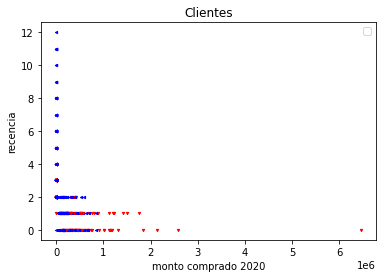

In [124]:
clasif=np.array((Monto20,Recencia))
for i in range(0,500):
    if Segmento[i]=="Adictos":
        marcar="v"
        color="red"
    elif Segmento[i]=="Aficionados":
        marcar="<"
        color="blue"
    elif Segmento[i]=="Esporadico":
        marcar="o"
        color="green"
    elif Segmento[i]=="Curiosos":
        marcar="s"
        color="orange"
    else:
        marcar="+"
        color="yellow"
    plt.scatter(x=clasif[0,i],y=clasif[1,i],c=color,s=5,marker=marcar)

 
plt.xlabel("monto comprado 2020")
plt.ylabel("recencia")
plt.title("Clientes")
plt.legend()



"""    j=i
for j in range(100, 200):
    plt.scatter(x=clasif[0,j],y=clasif[1,j],c="black",s=10,marker="x")   """

Según el analisis del trabajo Big data en el sector de seguros, los modelos mas utilizados son para los modelos no supervisados
el análisis de componentes principales y el analisis cluster. 

Para los supervisados serian las máquinas de vectores de soporte
las redes neuronales y la regresion logistica, cabe destacar que estos son los mas utilizados.


Pasos requeridos para la industrialización de modelos

Para industrializar un modelo se debe definir muy bien los parametros, analizar y describir los casos en los que fue probado, y 
que ha dado mejores resultados, se debe limpiar muy bien el codigo y ser entendible en general en caso de modificaciones u optimizaciones para ciertos casos